# Proximity Matrix Visualizations

This notebook visualizes proximity matrices from different methods. It includes:
1. MDS scatter plots colored by class label.
2. Heatmaps of the proximity matrices, sorted by class.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

In [7]:
TIME = "_monthly" # Change to "_monthly" or to "_hourly" as needed
# List of proximity files and their display names
prox_files = [
    (f'../data/prox_files{TIME}/quant_prox.npy', 'QGAP'),
    (f'../data/prox_files{TIME}/redcomets_prox.npy', 'REDCOMETS'),
    (f'../data/prox_files{TIME}/rocket_prox.npy', 'Rocket'),
    (f'../data/prox_files{TIME}/rdst_prox.npy', 'RDST'),
    (f'../data/prox_files{TIME}/pf_prox.npy', 'PF-GAP'),
    (f'../data/prox_files{TIME}/fresh_prince_prox.npy', 'FreshPrince'),
    (f'../data/prox_files{TIME}/dtw_matrix.npy', 'DTW'),
    (f'../data/prox_files{TIME}/cosine_matrix.npy', 'Cosine'),
    (f'../data/prox_files{TIME}/soft_dtw_matrix.npy', 'Soft-DTW'),
]

if TIME == "_monthly":
    labels_file = '../data/labels.csv'
    labels = pd.read_csv(labels_file).values.flatten()
else:
    time_series = pd.read_csv("/yunity/arusty/PF-GAP/data/Hourly_Returns_2024-10(Labels-included).csv")
    labels = time_series.pop("Sector").values

# Function to load and symmetrize a proximity matrix
def load_and_symmetrize(name, path):
    mat = np.load(path)

    if name in ['Cosine', "DTW", "Soft-DTW"]:

        # Normalize to [0, 1]
        mat = (mat - mat.min()) / (mat.max() - mat.min()) * 0.1
        return  0.1 - mat
    else:
        # Set the diagonal entries to 1
        np.fill_diagonal(mat, 1.0)
    
    return (mat + mat.T) / 2

# Function to plot MDS scatter

def mds_scatter(dist_matrix, labels, title="MDS Scatter Plot"):
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42, metric = False)
    coords = mds.fit_transform(1 - dist_matrix)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='tab20', s=30)
    plt.title(title)
    plt.xlabel("MDS1")
    plt.ylabel("MDS2")
    plt.colorbar(scatter, label="Class Label")
    plt.grid(True)
    plt.show()

def phate_scatter(dist_matrix, labels, title="PHATE Scatter Plot"):
    import phate
    phate_operator = phate.PHATE(n_components=2, knn=5, random_state=42, verbose=False)
    coords = phate_operator.fit_transform(1 - dist_matrix)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='tab20', s=30)
    plt.title(title)
    plt.xlabel("PHATE1")
    plt.ylabel("PHATE2")
    plt.colorbar(scatter, label="Class Label")
    plt.grid(True)
    plt.show()

# Function to plot UMAP scatter
def umap_scatter(dist_matrix, labels, title="UMAP Scatter Plot"):
    import umap
    reducer = umap.UMAP(n_components=2, metric="precomputed", random_state=42)
    coords = reducer.fit_transform(1 - dist_matrix)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='tab20', s=30)
    plt.title(title)
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.colorbar(scatter, label="Class Label")
    plt.grid(True)
    plt.show()

# Function to plot heatmap sorted by class
def heatmap_sorted(dist_matrix, labels, title="Proximity Matrix Heatmap (Sorted by Class)"):
    sort_idx = np.argsort(labels)
    sorted_matrix = dist_matrix[sort_idx][:, sort_idx]
    sorted_labels = labels[sort_idx]
    sorted_matrix = np.clip(sorted_matrix, 0, 0.1) 
    plt.figure(figsize=(10, 8))
    sns.heatmap(sorted_matrix, cmap='viridis', square=True, cbar=True)
    plt.title(title)
    plt.xlabel("Sample Index (sorted)")
    plt.ylabel("Sample Index (sorted)")

    # Find indices where the class changes
    class_change_indices = np.where(np.diff(sorted_labels) != 0)[0] + 1
    for idx in class_change_indices:
        plt.axvline(idx, color='white', linestyle='--', linewidth=1)
        plt.axhline(idx, color='white', linestyle='--', linewidth=1)

    plt.show()

# Loop through all proximity files and visualize
for path, name in prox_files:
    try:
        mat = load_and_symmetrize(name, path)
        print(f"\n--- {name} at {TIME[1:]} Intervals ---")
        print(f"Matrix shape: {mat.shape}")

        mds_scatter(mat, labels, title=f"MDS Scatter Plot: {name}")
        phate_scatter(mat, labels, title=f"PHATE Scatter Plot: {name}")
        umap_scatter(mat, labels, title=f"UMAP Scatter Plot: {name}")
        heatmap_sorted(mat, labels, title=f"Proximity Matrix Heatmap (Sorted by Class): {name}")
    except Exception as e:
        print(f"Could not process {name}: {e}")


--- QGAP at monthly Intervals ---
Matrix shape: (496, 496)
Could not process QGAP: name 'MDS' is not defined

--- REDCOMETS at monthly Intervals ---
Matrix shape: (496, 496)
Could not process REDCOMETS: name 'MDS' is not defined

--- Rocket at monthly Intervals ---
Matrix shape: (496, 496)
Could not process Rocket: name 'MDS' is not defined

--- RDST at monthly Intervals ---
Matrix shape: (496, 496)
Could not process RDST: name 'MDS' is not defined

--- PF-GAP at monthly Intervals ---
Matrix shape: (496, 496)
Could not process PF-GAP: name 'MDS' is not defined

--- FreshPrince at monthly Intervals ---
Matrix shape: (496, 496)
Could not process FreshPrince: name 'MDS' is not defined

--- DTW at monthly Intervals ---
Matrix shape: (496, 496)
Could not process DTW: name 'MDS' is not defined

--- Cosine at monthly Intervals ---
Matrix shape: (496, 496)
Could not process Cosine: name 'MDS' is not defined

--- Soft-DTW at monthly Intervals ---
Matrix shape: (496, 496)
Could not process Soft

---

**Instructions:**
- To visualize a different proximity matrix, change the `prox_file` path in the code above.
- Ensure the labels file matches the order of the proximity matrix rows.

# Optimized Proximity Matricies

In [4]:
import sys
sys.path.insert(0, '/yunity/arusty/PF-GAP')

from RFGAP_Rocket.RFGAP_Rocket import RFGAP_Rocket
from RDST.rdst import RDST_GAP
from QGAP.qgap import QGAP
from Redcomets.Redcomets import REDCOMETS
from FreshPrince.FreshPrince import FreshPRINCE_GAP
from rfgap import RFGAP



def get_rocket_prox(X, y, static, params):
    rocket = RFGAP_Rocket(prediction_type = "classification", # Classification or Regression
                           rocket = params["rocket"], # Rocket or MultiRocket
                         n_kernels=params["n_kernels"]) # 512 or other integers
    
    rocket.fit(X, y, static, weights = params["weights"]) #Value between 0 and 1
    return rocket.get_proximities().toarray()

def get_rdst_prox(X, y, static, params):
    rdst = RDST_GAP(save_transformed_data = True,
                    max_shapelets = params["max_shapelets"], # Any integer
                    shapelet_lengths = params["shapelet_length"], #Any number, default is min(max(2,n_timepoints//2),11)
                    alpha_similarity = params["alpha_similarity"]) # Betweeen 0 and 1
    
    rdst.fit(X, y, static = static)
    return rdst.get_proximities().toarray()

def get_qgap_prox(X, y, static, params):
    qgap = QGAP(matrix_type="dense",
                interval_depth = params["interval_depth"], # Any integer: 2 ** depth
                quantile_divisor = params["quantile_divisor"] # Any integer: 1 + (interval_length - 1) // quantile_divisor
    )
    qgap.fit(X, y, static = static)
    return qgap.get_proximities()

def get_redcomets_prox(X, y, static, params):
    rc = REDCOMETS(static = static, variant=3,
                   perc_length=params["perc_length"], # Percentage of time series length to use
                   n_trees=params["n_trees"], # Number of trees in the forest
                   random_state=42)
    rc.fit(X, y)
    return rc.get_ensemble_proximities(X, group = "all")

def get_fresh_prox(X, y, static, params):
    fp = FreshPRINCE_GAP(default_fc_parameters=params["default_fc_parameters"], # "minimal", "efficient", "comprehensive"
                         n_estimators=params["n_estimators"] # Number of estimators for the rotation forest ensemble
                         )
    fp.fit(X, y, static = static)
    return np.array(fp.get_proximities().todense())
    
def get_rf_prox(X, y, static, params):
    rfgap = RFGAP(prediction_type="classification", y = y,
                  prox_method=params["prox_method"], # "original", "rfgap:, "oob""
                  n_estimators=params["n_estimators"], # Number of estimators in the radnom forest
                  ccp_alpha=params["ccp_alpha"], # Complexity parameter for pruning
                  max_depth=params["max_depth"],
                  non_zero_diagonal = False # Maximum depth of the trees
                  )
    X_train = np.concat([X, static], axis=1)
    rfgap.fit(X_train, y)
    return rfgap.get_proximities().toarray()

In [2]:
import json
import numpy as np
import pandas as pd

static2024 = pd.read_csv('../data/static2024.csv')
static2023 = pd.read_csv('../data/static2023.csv')
static2022 = pd.read_csv('../data/static2022.csv')
static2025 = pd.read_csv('../data/static2025.csv')
time_series = np.array(pd.read_csv('../data/time_series.csv'))
labels = pd.read_csv('../data/labels.csv')
labels = np.array(labels).flatten()


In [4]:
with open('/yunity/arusty/PF-GAP/data/opimized_models/Rocket_optimized_params.json', 'r') as f:
    rocket_params = json.load(f)

rocket_prox = get_rocket_prox(time_series, labels, static2024, rocket_params)
np.fill_diagonal(rocket_prox, 1.0)

np.save('../data/opimized_models/rocket_prox.npy', rocket_prox)

In [5]:
with open('/yunity/arusty/PF-GAP/data/opimized_models/QGAP_optimized_params.json', 'r') as f:
    qgap_params = json.load(f)
qgap_prox = get_qgap_prox(time_series, labels, static2024, qgap_params)
np.fill_diagonal(qgap_prox, 1.0)
np.save('../data/opimized_models/qgap_prox.npy', qgap_prox)

In [6]:
with open('/yunity/arusty/PF-GAP/data/opimized_models/RDST_optimized_params.json', 'r') as f:
    rdst_params = json.load(f)
rdst_prox = get_rdst_prox(time_series, labels, static2024, rdst_params)
np.fill_diagonal(rdst_prox, 1.0)

np.save('../data/opimized_models/rdst_prox.npy', rdst_prox)

In [7]:
with open('/yunity/arusty/PF-GAP/data/opimized_models/REDCOMETS_optimized_params.json', 'r') as f:
    redcomets_params = json.load(f)
redcomets_prox = get_redcomets_prox(time_series, labels, static2024, redcomets_params)
np.fill_diagonal(redcomets_prox, 1.0)

np.save('../data/opimized_models/redcomets_prox.npy', redcomets_prox)

In [8]:
with open('/yunity/arusty/PF-GAP/data/opimized_models/FRESH_optimized_params.json', 'r') as f:
    fresh_params = json.load(f)
fresh_prox = get_fresh_prox(time_series, labels, static2024, fresh_params)
np.fill_diagonal(fresh_prox, 1.0)

np.save('../data/opimized_models/fresh_prince_prox.npy', fresh_prox)

In [5]:
with open('/yunity/arusty/PF-GAP/data/opimized_models/RF_optimized_params.json', 'r') as f:
    rf_params = json.load(f)
rf_prox = get_rf_prox(time_series, labels, static2024, rf_params)

np.save('../data/opimized_models/rf_prox.npy', rf_prox)

# Run the Visualizations


--- Qgap at monthly Intervals ---
Matrix shape: (496, 496)


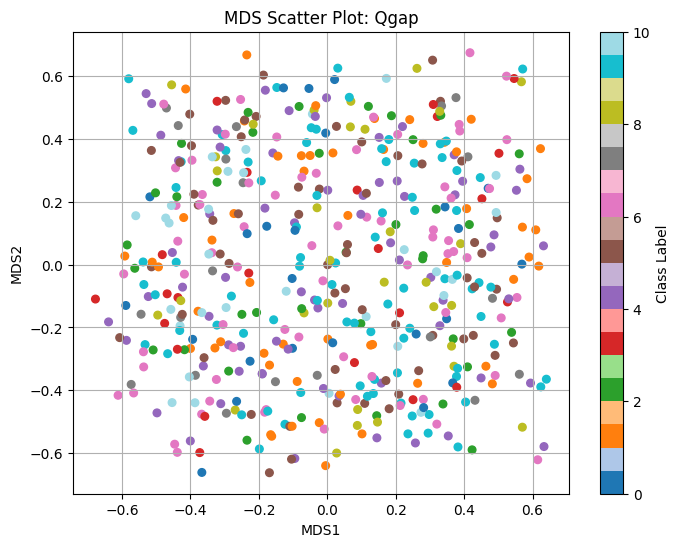

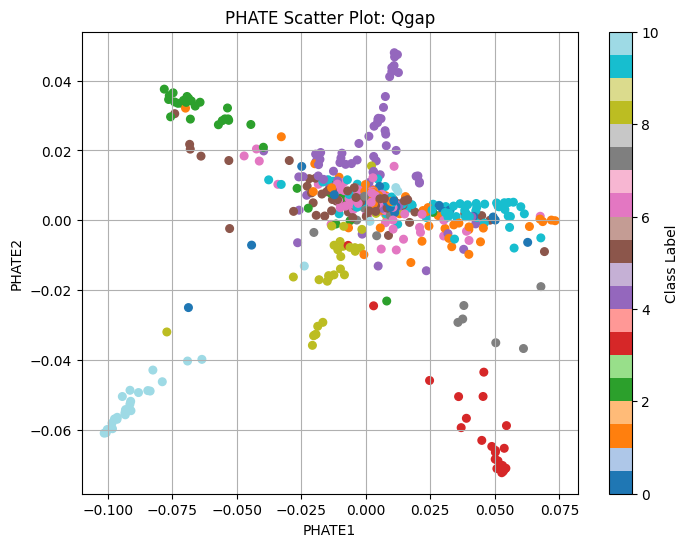

/yunity/arusty/PF-GAP/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/yunity/arusty/PF-GAP/.venv/lib/python3.12/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/yunity/arusty/PF-GAP/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


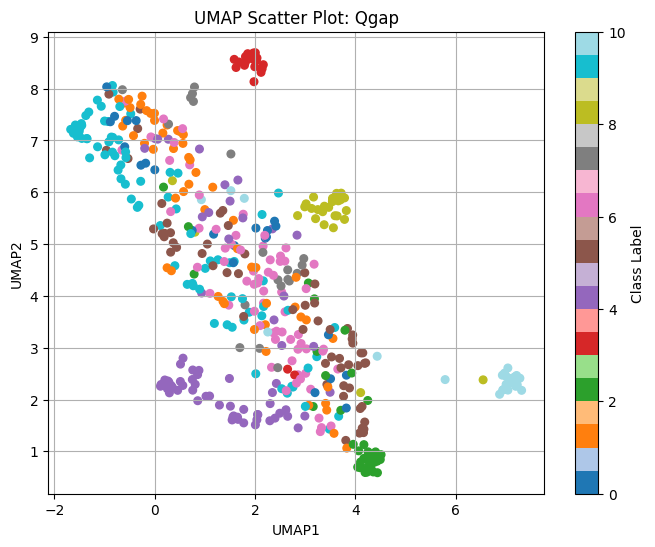

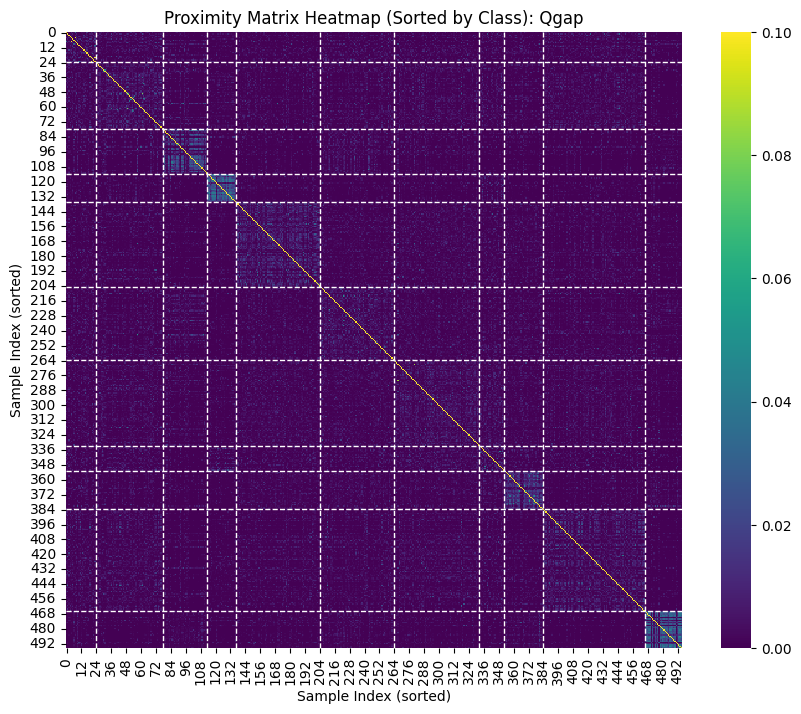


--- Rocket at monthly Intervals ---
Matrix shape: (496, 496)


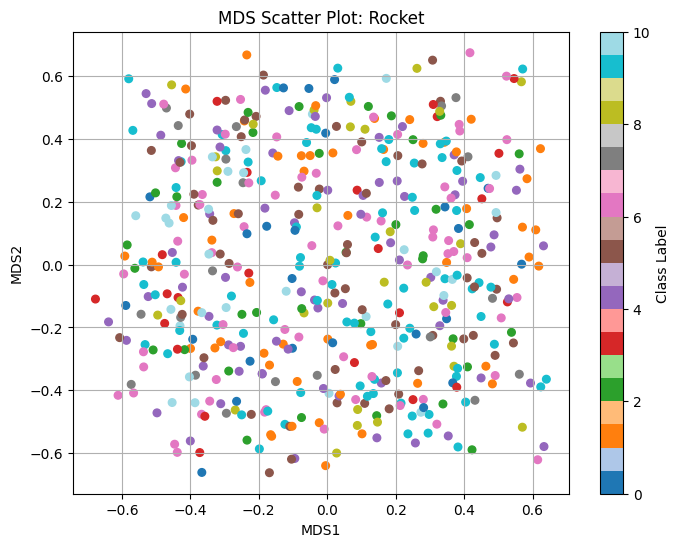

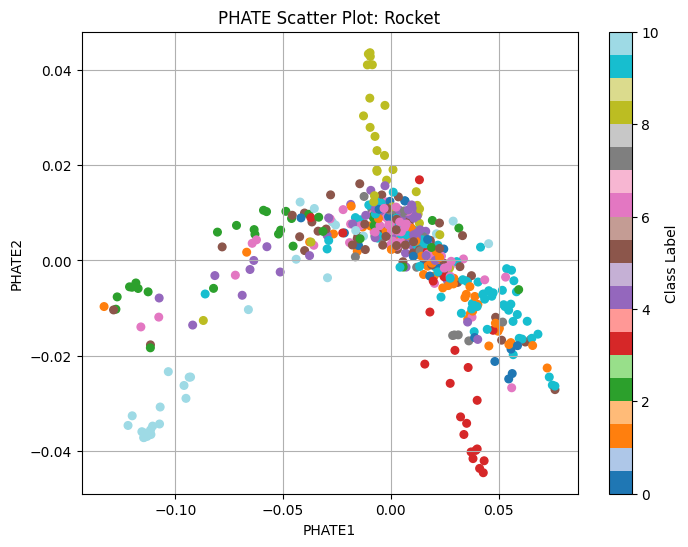

/yunity/arusty/PF-GAP/.venv/lib/python3.12/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/yunity/arusty/PF-GAP/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


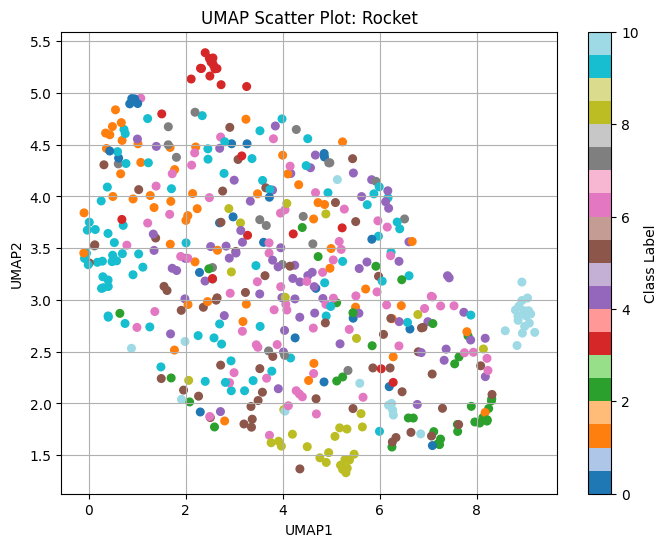

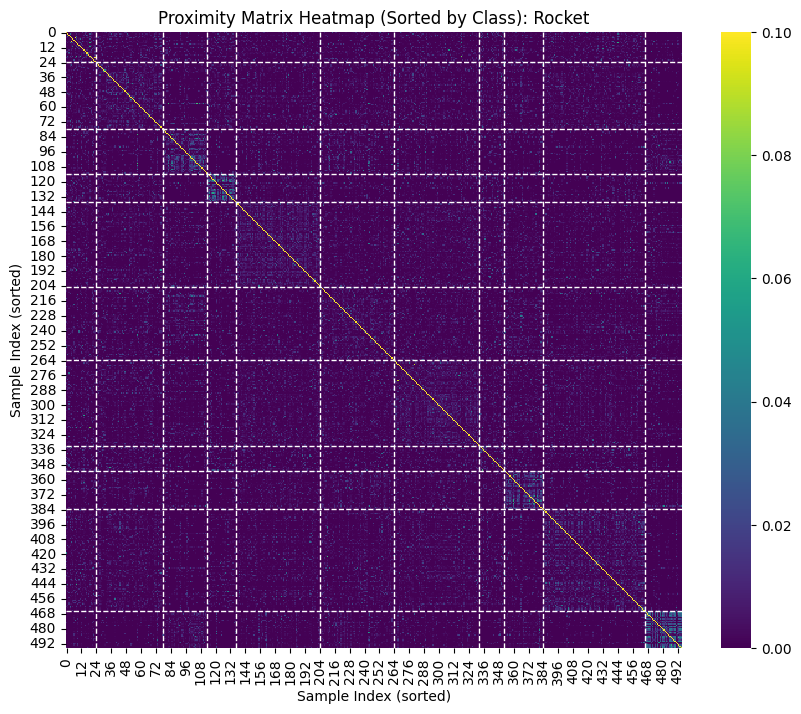


--- Redcomets at monthly Intervals ---
Matrix shape: (496, 496)


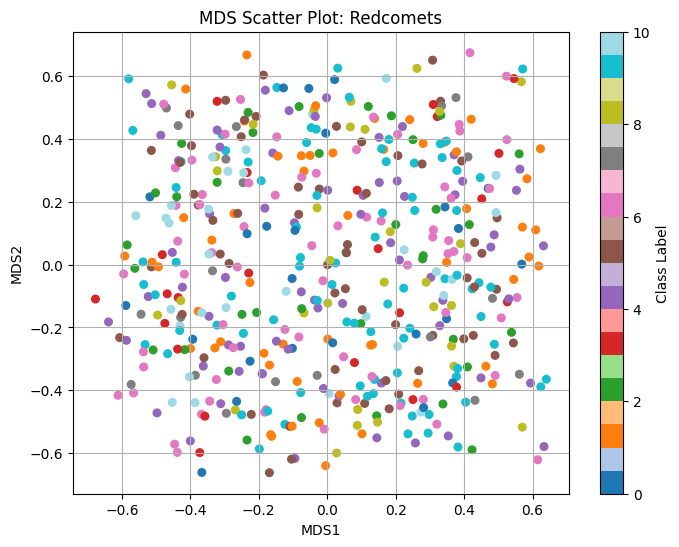

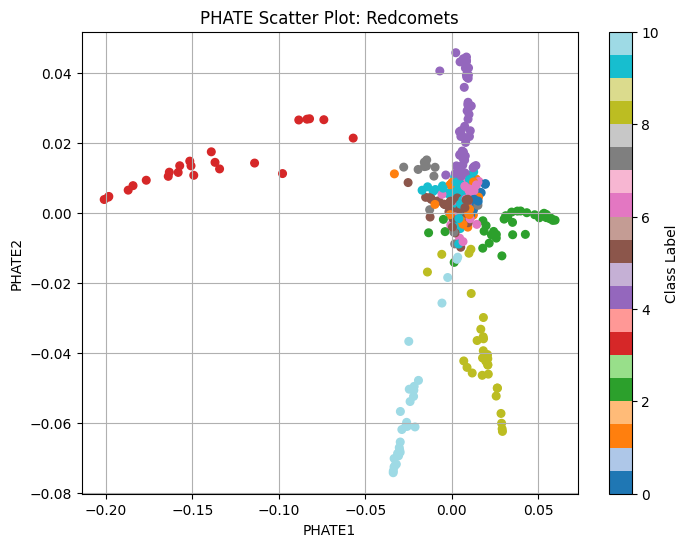

/yunity/arusty/PF-GAP/.venv/lib/python3.12/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/yunity/arusty/PF-GAP/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


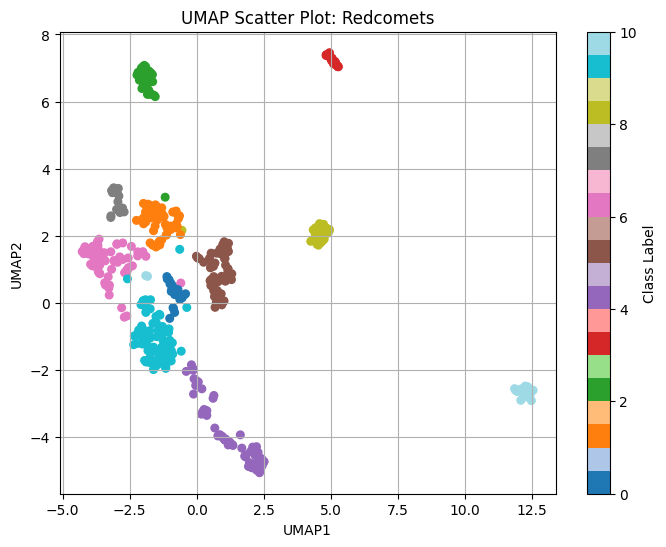

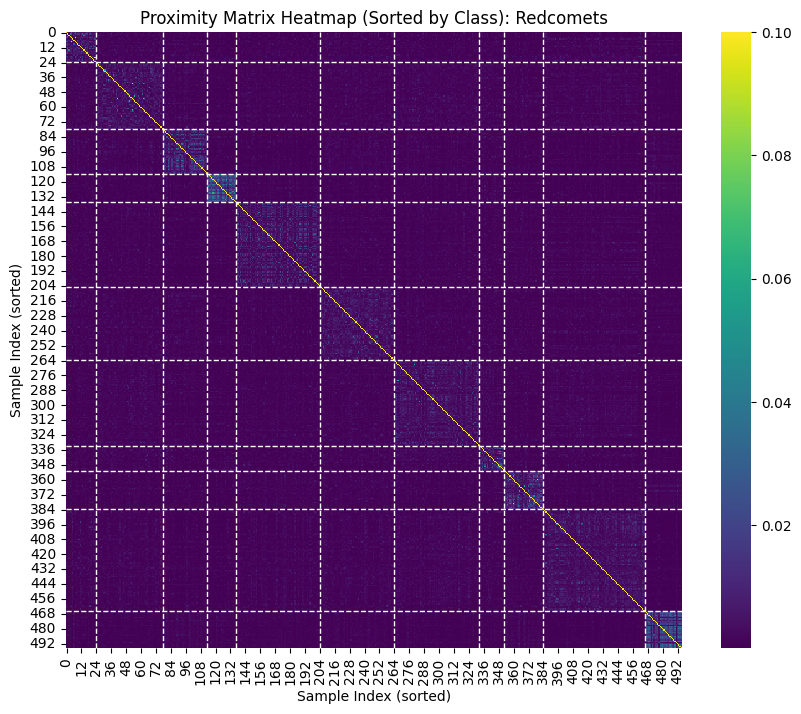


--- Rf at monthly Intervals ---
Matrix shape: (496, 496)


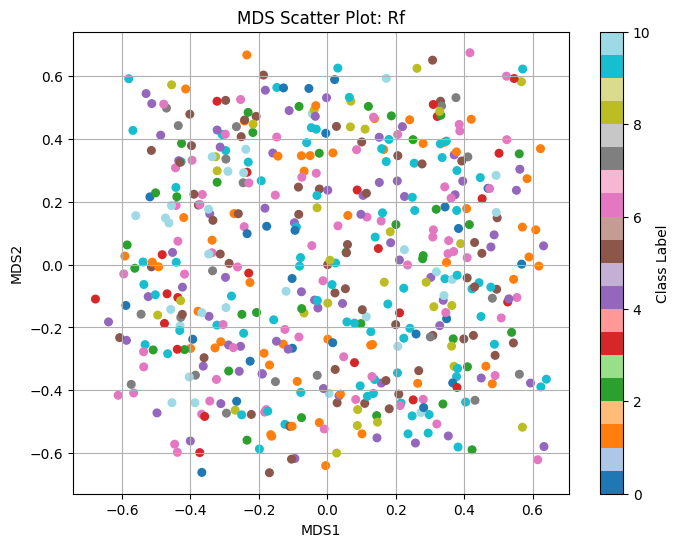

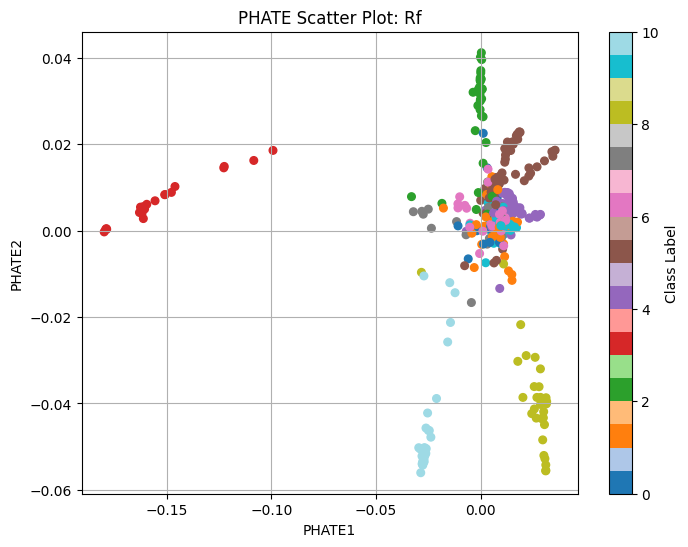

/yunity/arusty/PF-GAP/.venv/lib/python3.12/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/yunity/arusty/PF-GAP/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


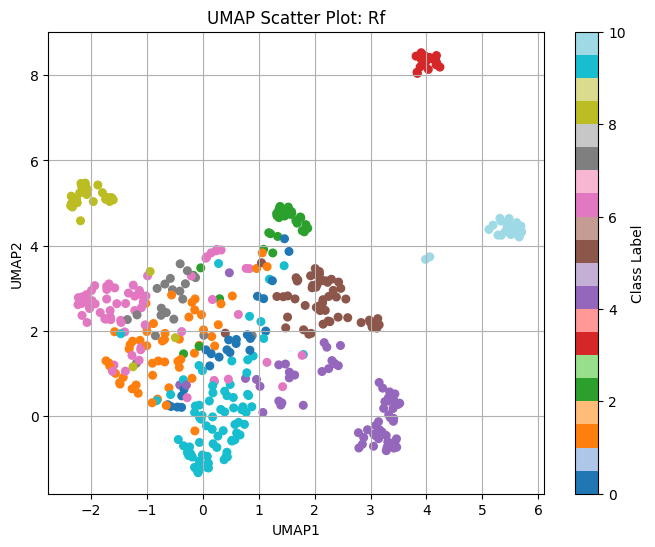

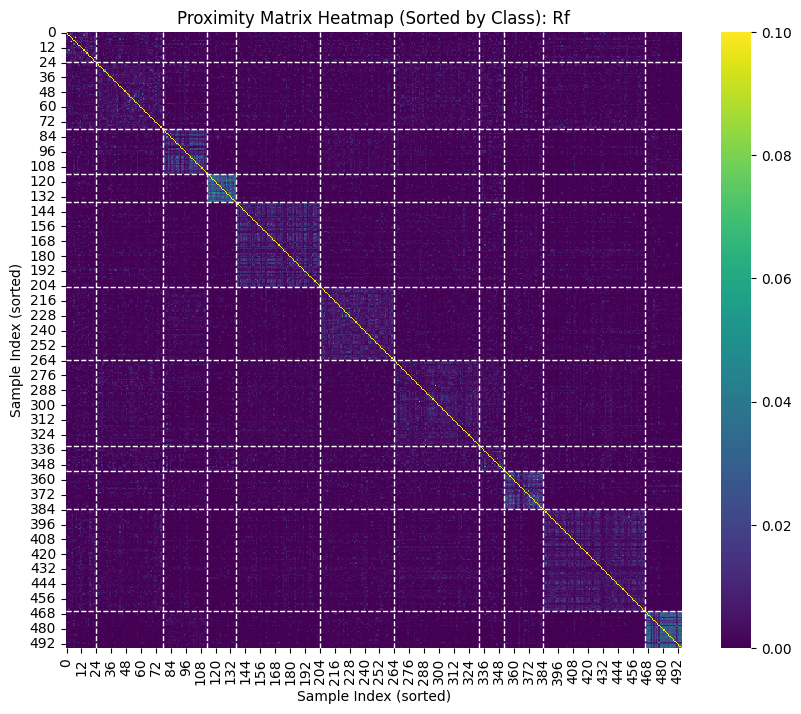


--- Rdst at monthly Intervals ---
Matrix shape: (496, 496)


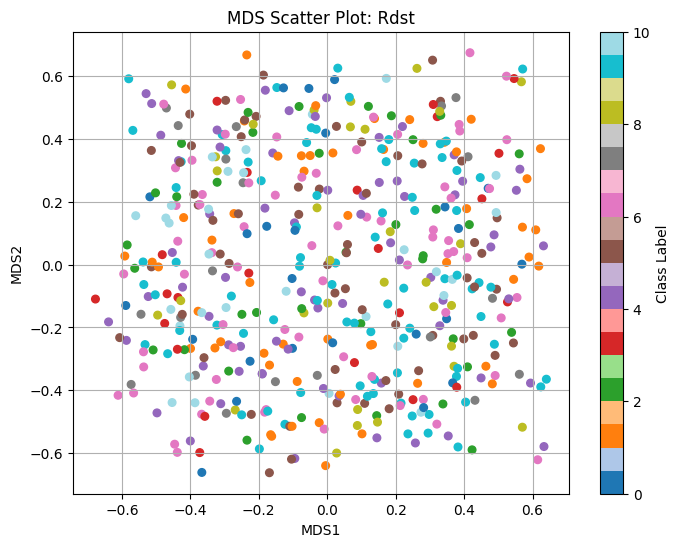

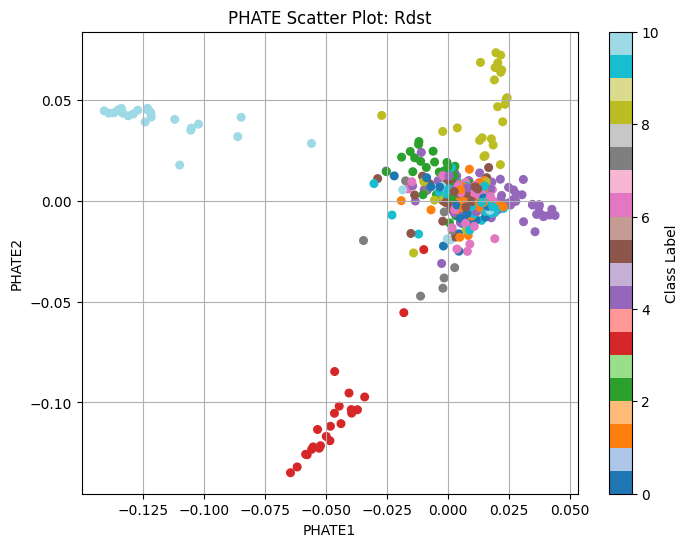

/yunity/arusty/PF-GAP/.venv/lib/python3.12/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/yunity/arusty/PF-GAP/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


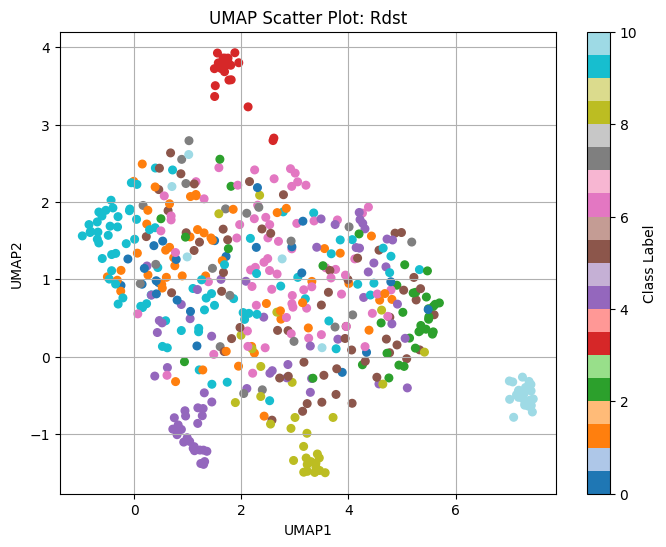

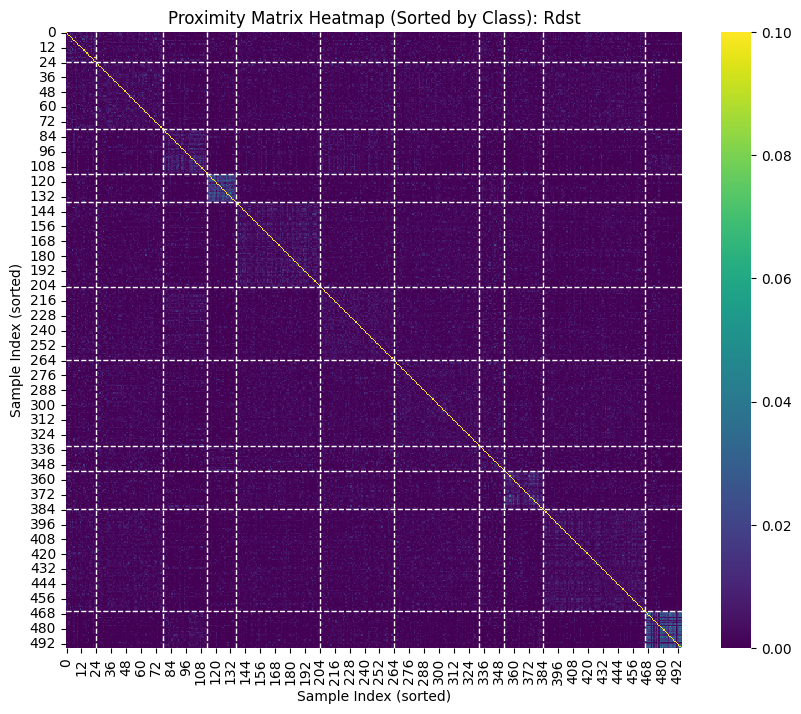


--- Fresh at monthly Intervals ---
Matrix shape: (496, 496)


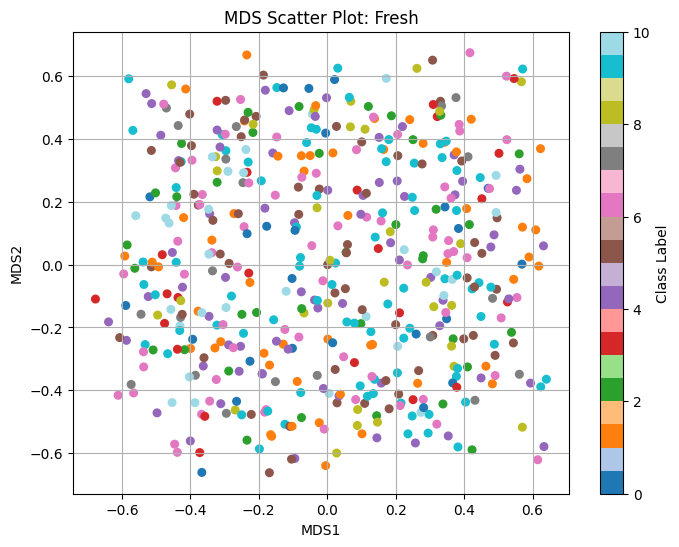

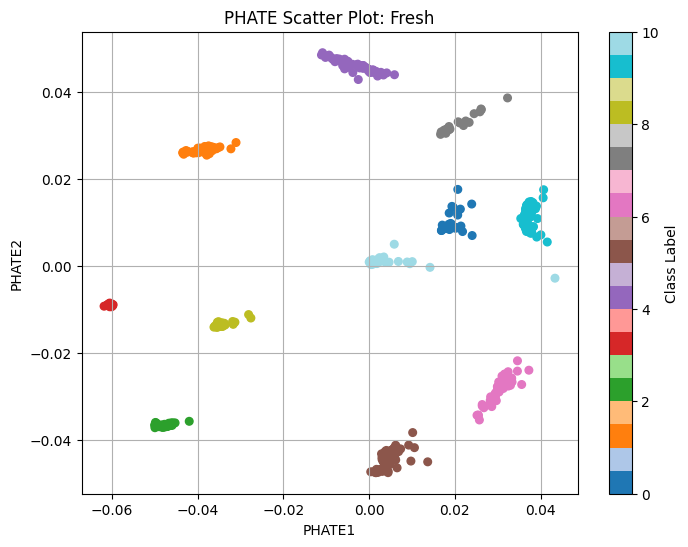

/yunity/arusty/PF-GAP/.venv/lib/python3.12/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/yunity/arusty/PF-GAP/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


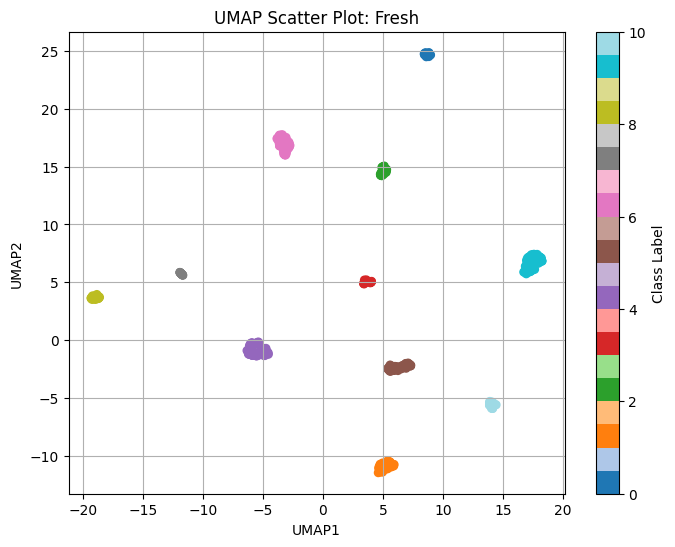

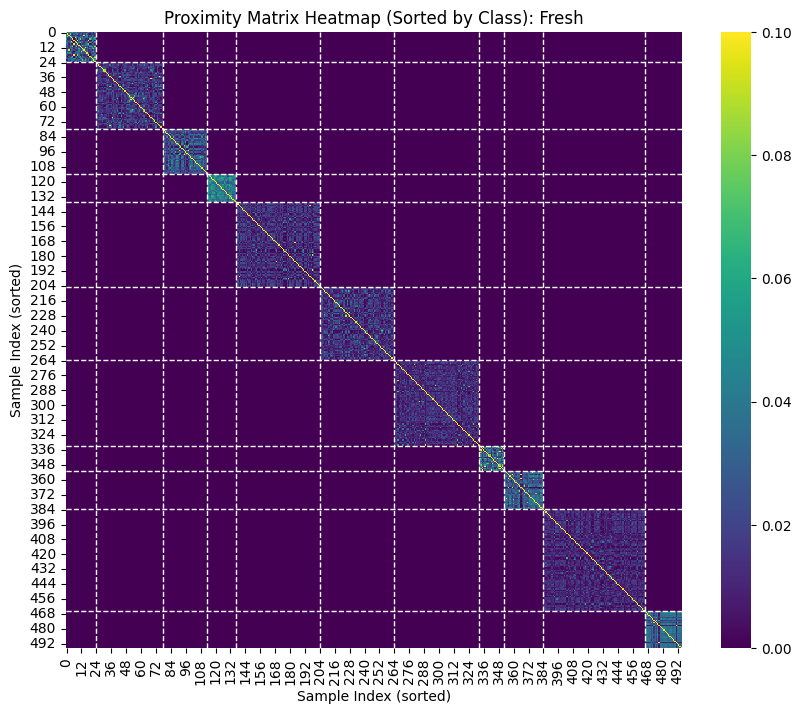

In [9]:
optimized_dir = '../data/opimized_models/'
import os
for file in os.listdir(optimized_dir):
    path = os.path.join(optimized_dir, file)
    if path.endswith('.npy'):
        try:
            name = file.split('_')[0].capitalize()
            mat = load_and_symmetrize(name, path)
            print(f"\n--- {name} at {TIME[1:]} Intervals ---")
            print(f"Matrix shape: {mat.shape}")

            mds_scatter(mat, labels, title=f"MDS Scatter Plot: {name}")
            phate_scatter(mat, labels, title=f"PHATE Scatter Plot: {name}")
            umap_scatter(mat, labels, title=f"UMAP Scatter Plot: {name}")
            heatmap_sorted(mat, labels, title=f"Proximity Matrix Heatmap (Sorted by Class): {name}")
        except Exception as e:
            print(f"Could not process {name}: {e}")

In [8]:
# Sector  Labels
# 3   Communication Services       0
# 5   Consumer Discretionary       1
# 11        Consumer Staples       2
# 15                  Energy       3
# 7               Financials       4
# 10              Healthcare       5
# 46             Industrials       6
# 33               Materials       7
# 97             Real Estate       8
# 0               Technology       9
# 59               Utilities      10